# Installation

In [ ]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00


# Imports

In [ ]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import time
from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Dense,Flatten,InputLayer,BatchNormalization,Dropout,Input,LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import (BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives,
                                       TrueNegatives, Precision, Recall, AUC, binary_accuracy,Accuracy,
                                       TopKCategoricalAccuracy, CategoricalAccuracy,SparseCategoricalAccuracy)
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from google.colab import files
from datasets import load_dataset
from transformers import (BertTokenizerFast,TFBertTokenizer,BertTokenizer,RobertaTokenizerFast,
                          DataCollatorWithPadding,TFRobertaForSequenceClassification,TFBertForSequenceClassification,
                          TFBertModel,create_optimizer,TFDebertaForSequenceClassification,DebertaTokenizerFast, )

In [ ]:
BATCH_SIZE=16

# Data Preparation

In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d bitext/training-dataset-for-chatbotsvirtual-assistants
!unzip "/content/training-dataset-for-chatbotsvirtual-assistants.zip" -d "/content/dataset/"

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 86% 1.00M/1.16M [00:00<00:00, 1.07MB/s]
100% 1.16M/1.16M [00:01<00:00, 1.20MB/s]
Archive:  /content/training-dataset-for-chatbotsvirtual-assistants.zip
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv  
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.xlsx  
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/LICENSE.txt  
  inflating: /content/dataset/20000-Ut

In [ ]:
dataset=load_dataset("csv",
                       data_files="/content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent'],
        num_rows: 21534
    })
})

In [ ]:
dataset['train'][0]

{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 'create_account'}

In [ ]:
intents=list(set(dataset['train']['intent']))
dict_intents={intents[i]: i for i in range(len(intents))}
print(dict_intents)
print(len(intents))

{'complaint': 0, 'recover_password': 1, 'change_order': 2, 'contact_customer_service': 3, 'edit_account': 4, 'newsletter_subscription': 5, 'delete_account': 6, 'change_shipping_address': 7, 'delivery_options': 8, 'check_payment_methods': 9, 'check_refund_policy': 10, 'review': 11, 'track_order': 12, 'registration_problems': 13, 'track_refund': 14, 'get_invoice': 15, 'cancel_order': 16, 'place_order': 17, 'set_up_shipping_address': 18, 'create_account': 19, 'switch_account': 20, 'contact_human_agent': 21, 'check_cancellation_fee': 22, 'get_refund': 23, 'payment_issue': 24, 'check_invoices': 25, 'delivery_period': 26}
27


In [ ]:
def preprocess(dataset):
  return {'utterance': dataset['utterance'],
          'intent':dict_intents[dataset['intent']]}

In [ ]:
prep_dataset=dataset.map(preprocess)

Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [ ]:
prep_dataset['train'][0]

{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 19}

In [ ]:
model_id="microsoft/deberta-base"
tokenizer = DebertaTokenizerFast.from_pretrained(model_id)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

In [ ]:
def tokenizer_function(dataset):
  return tokenizer(dataset["utterance"],)

In [ ]:
tokenized_dataset=prep_dataset.map(tokenizer_function)

Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 21534
    })
})

In [ ]:
tokenized_dataset['train'][0]

{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 19,
 'input_ids': [1,
  100,
  218,
  75,
  33,
  41,
  804,
  1316,
  6,
  99,
  109,
  38,
  33,
  7,
  109,
  7,
  5124,
  116,
  2],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
tf_dataset = tokenized_dataset["train"].to_tf_dataset(
    columns=['input_ids','attention_mask', 'intent'],
    shuffle=True,
    batch_size=BATCH_SIZE,
    collate_fn=data_collator
)

You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
def swap_positions(dataset):
  return {'input_ids':dataset['input_ids'],
          'attention_mask':dataset['attention_mask'],},dataset['intent']

In [ ]:
tf_dataset=tf_dataset.map(swap_positions)

In [ ]:
train_dataset=tf_dataset.take(int(0.9*len(tf_dataset)))
val_dataset=tf_dataset.skip(int(0.9*len(tf_dataset)))

In [ ]:
for i in val_dataset.take(1):
  print(i)

({'input_ids': <tf.Tensor: shape=(16, 24), dtype=int64, numpy=
array([[    1,  8569,    64,   939, 24442,    10,  3674,    13,    10,
          544,   116,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    1,   100,   399,    75,  1325,   127,  4033,     6,    99,
           64,    38,   109,     7,  1649,   106,   116,     2,     0,
            0,     0,     0,     0,     0,     0],
       [    1,   118,   236,     7, 18981,   743,   442,    10,  3207,
            2,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    1,   100,   218,    75,  1346,    47,     6,    99,   109,
           38,    33,     7,   109,     7,  1511,    10,  1050,   116,
            2,     0,     0,     0,     0,     0],
       [    1,   100,   236,     7,   216,   114,    38,    64,   146,
           10,  3207,    19,  1918,  3463,     2,     0,     0,     0,
            0,     0,  

# Modeling

## Based on TFDebertaForSequenceClassification

In [ ]:
model=TFDebertaForSequenceClassification.from_pretrained(model_id,num_labels=len(intents))
model.summary()

tf_model.h5:   0%|          | 0.00/555M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['cls_dropout', 'classifier', 'pooler']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_deberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 deberta (TFDebertaMainLaye  multiple                  138601728 
 r)                                                              
                                                                 
 pooler (TFDebertaContextPo  multiple                  590592    
 oler)                                                           
                                                                 
 cls_dropout (TFDebertaStab  multiple                  0         
 leDropout)                                                      
                                                                 
 classifier (Dense)          multiple                  20763     
                                                                 
Total params: 139213083 (531.06 MB)
Trainable params: 139213083 (531.06 MB)
Non-trainable para

# Training

In [ ]:
num_epochs = 2
batches_per_epoch = len(tokenized_dataset["train"]) // BATCH_SIZE
total_train_steps = int(batches_per_epoch * num_epochs)

In [ ]:
optimizer, schedule = create_optimizer(init_lr=2e-5,num_warmup_steps=0, num_train_steps=total_train_steps)

In [ ]:
model.compile(optimizer=optimizer,
    metrics=["accuracy"])

In [ ]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3,)

Epoch 1/3
1211/1211 [==============================] - 341s 281ms/step - loss: 0.2683 - accuracy: 0.9404 - val_loss: 0.0045 - val_accuracy: 0.9995
Epoch 2/3
1211/1211 [==============================] - 278s 230ms/step - loss: 0.0125 - accuracy: 0.9980 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/3
1211/1211 [==============================] - 276s 228ms/step - loss: 0.0051 - accuracy: 0.9996 - val_loss: 0.0025 - val_accuracy: 0.9995


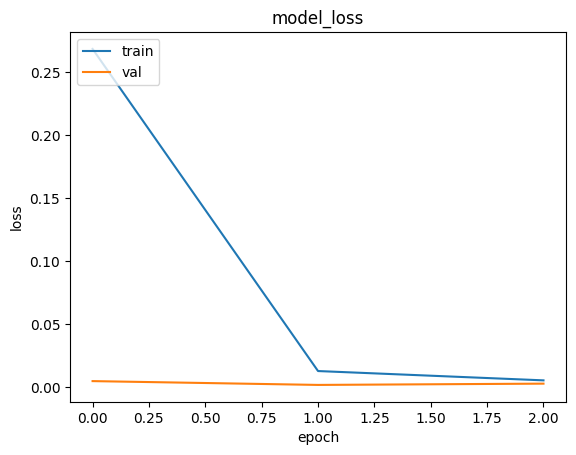

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

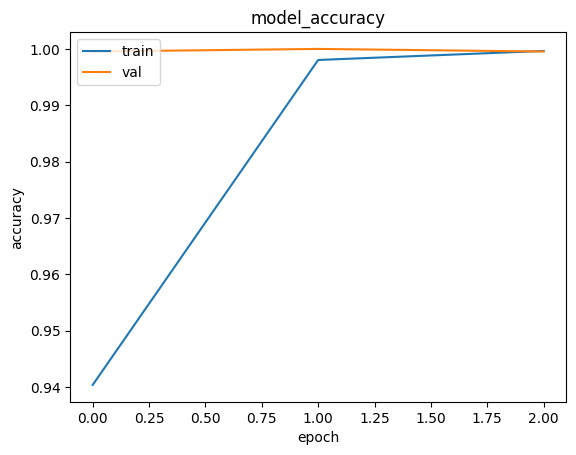

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluation

## Confusion Matrix

In [ ]:
predicted = []
labels = []

for input, label in val_dataset:
  predicted.append(model(**input).logits)
  labels.append(label.numpy())

In [ ]:
print(predicted)
print(labels)

[<tf.Tensor: shape=(16, 27), dtype=float32, numpy=
array([[-5.69735646e-01, -4.03633147e-01, -3.14874172e-01,
        -9.52752158e-02, -8.69691908e-01, -9.45386708e-01,
        -1.83211172e+00, -8.06252718e-01, -1.68465722e+00,
         1.65780723e-01, -4.93232906e-01, -1.24056315e+00,
        -1.56415176e+00,  3.72562498e-01, -3.61846596e-01,
        -3.64748269e-01, -1.64616323e+00, -1.57928252e+00,
        -1.83302808e+00, -1.15516865e+00, -2.70332289e+00,
        -9.48819160e-01, -7.33170986e-01,  2.23777592e-01,
         1.07014284e+01, -2.58851558e-01, -6.12661421e-01],
       [-9.25380647e-01, -1.99504793e+00, -8.70016277e-01,
        -2.76420087e-01, -2.02255607e+00, -6.65151000e-01,
        -2.40430140e+00, -1.00997305e+00, -1.04913151e+00,
         1.25173321e-02, -1.26507163e+00, -1.10023582e+00,
        -1.10037529e+00, -9.34034348e-01, -9.59975183e-01,
         9.56794071e+00, -2.10100675e+00,  3.83160919e-01,
        -6.33915842e-01, -6.74436510e-01, -1.40268660e+00,
    

In [ ]:
print(tf.argmax(predicted[:-1],axis=-1).numpy())
print(labels[:-1])

[[24 15  0 ...  0  0 15]
 [24 23 20 ... 24  3 25]
 [ 3 19  1 ... 19  3  3]
 ...
 [ 3 18 24 ... 24 12  3]
 [10 20  9 ...  6 19 11]
 [18 15  6 ... 11  3 21]]
[array([24, 15,  0, 24,  1, 24, 24, 24,  3, 24, 19, 24, 21,  0,  0, 15]), array([24, 23, 20,  0, 24,  7, 23,  4, 24, 24, 12, 24, 24, 24,  3, 25]), array([ 3, 19,  1, 12, 19,  1, 22,  6, 15, 22, 25, 19, 24, 19,  3,  3]), array([ 0, 15, 12, 23,  6, 19, 20,  0,  6, 15, 11, 24, 12, 19,  2, 23]), array([ 3, 24, 15, 10, 24,  3,  3,  2, 23,  3,  6, 21, 11, 24, 19,  1]), array([ 2, 24, 15,  6,  5, 19,  0, 24,  0, 21, 11, 15,  7,  2, 19,  1]), array([ 0, 23,  3, 25, 23, 24, 24,  0, 10, 15, 24, 24, 24, 19, 15, 23]), array([ 6, 15, 23, 13, 24,  0, 15, 19, 19, 25, 19,  3,  6, 15, 24, 24]), array([19, 23, 12, 24, 24,  3,  8,  3, 24, 19, 24, 24, 12, 15, 12, 25]), array([ 8, 21, 24, 19, 11, 18, 22,  0, 11, 15, 23, 15, 12,  5, 19, 19]), array([23, 25, 24, 23,  8, 19,  0, 21,  3,  0,  0,  1,  3, 23, 15, 14]), array([11, 24, 19,  0,  1,  0, 21, 19, 1

In [ ]:
print(np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))

[24 15  0 ... 21 22 24]
[24 15  0 ... 21 22 24]


In [ ]:
pred=np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()])
lab=np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])

[[102   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0  89   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0 205   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  22   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  11   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  37   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 

Text(0.5, 146.7222222222222, 'Predicted')

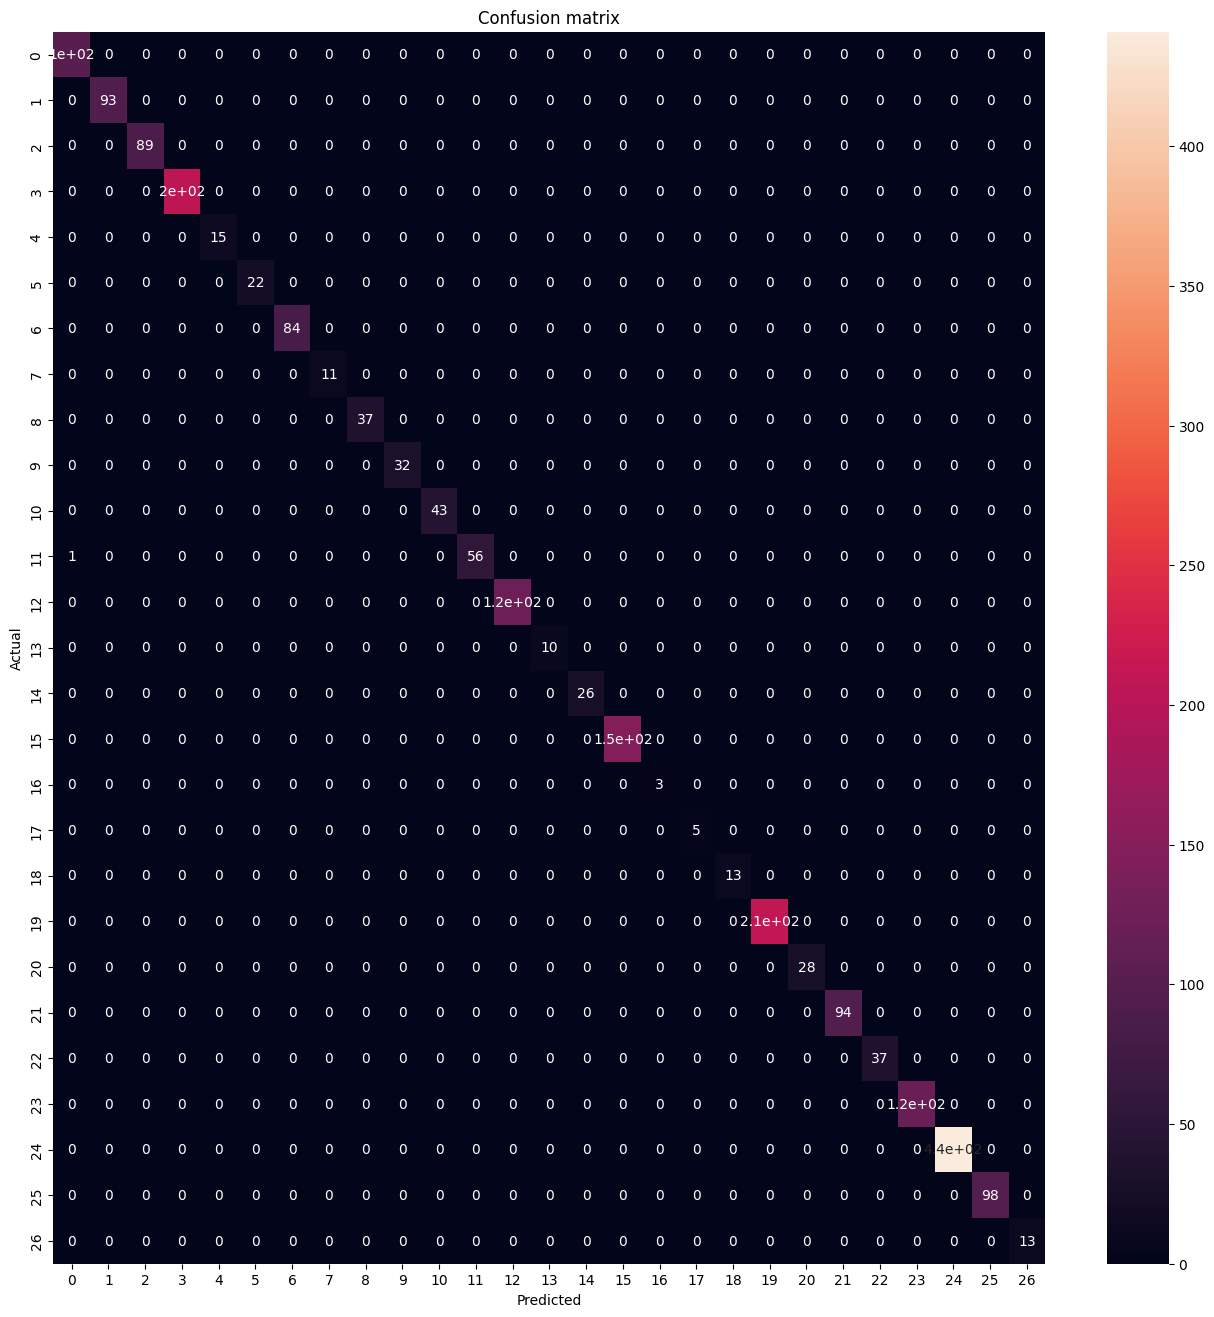

In [ ]:
cm = confusion_matrix(lab, pred)
print(cm)
plt.figure(figsize=(16,16))

sns.heatmap(cm, annot=True,)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Testing


In [ ]:
inputs = tokenizer(["Please how do i go about the account creation? ",
                    "After setting up my account, i feel like i need to change it. How do i go about that?",
                    "how do i know how much i need to pay?",
                    "purchased a product, which i now want to change"
                    ], padding=True,return_tensors="tf")

logits = model(**inputs).logits
outputs=tf.argmax(logits,axis=-1).numpy()

In [ ]:
print(outputs)

[19  4  9  2]


In [ ]:
reverse_dict_intents={i:intents[i] for i in range(len(intents))}
print(reverse_dict_intents)

{0: 'complaint', 1: 'recover_password', 2: 'change_order', 3: 'contact_customer_service', 4: 'edit_account', 5: 'newsletter_subscription', 6: 'delete_account', 7: 'change_shipping_address', 8: 'delivery_options', 9: 'check_payment_methods', 10: 'check_refund_policy', 11: 'review', 12: 'track_order', 13: 'registration_problems', 14: 'track_refund', 15: 'get_invoice', 16: 'cancel_order', 17: 'place_order', 18: 'set_up_shipping_address', 19: 'create_account', 20: 'switch_account', 21: 'contact_human_agent', 22: 'check_cancellation_fee', 23: 'get_refund', 24: 'payment_issue', 25: 'check_invoices', 26: 'delivery_period'}


In [ ]:
for i in outputs:
  print(reverse_dict_intents[i])

create_account
edit_account
check_payment_methods
change_order
